# MOwNiT 

## Laboratorium 3

## Interpolacja Lagrange'a

Przypomnijmy, że wielomianem interpolacyjnym Lagrange'a funkcji $f$ w puntach $x_1,...,x_n$ nazywamy wielomian dany wzorem
$$W(x)=\sum_{j=1}^n f(x_j)\prod_{i\neq j}\frac{x-x_i}{x_j-x_i}.$$

Python posiada niezbyt numerycznie stabilną funkcję do znajdywania wielomianu interpolacyjnego Lagrange'a. Funkcja ta znajduje się w bibliotece `scipy.interpolate`.

In [1]:
import numpy as np
import scipy.interpolate as si

x = np.array([0, 1, 2])
y = np.sin(x)

poly = si.lagrange(x, y)

print(poly)

         2
-0.3868 x + 1.228 x


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6600/3391280821.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xp,np.sin(xp),'b',label='$\sin x$')


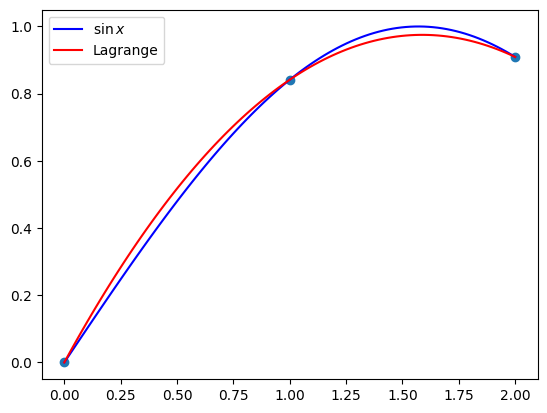

In [2]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

xp=np.linspace(0,2,100)

plt.plot(xp,np.sin(xp),'b',label='$\sin x$')
plt.plot(xp,Polynomial(poly.coef[::-1])(xp),'r',label='Lagrange')
plt.scatter(x,y)
plt.legend()
plt.show()

In [3]:
np.random.seed(7777)

### Zadanie 1. (1 pkt)

Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z węzłami interpolacji.

In [4]:
def get_interp_func(xs: np.ndarray, ys: np.ndarray):
    def lagrange(x, xs: np.ndarray, ys: np.ndarray):
        n = len(xs)
        curr_sum = 0

        for j in range(n):
            prod = ys[j]
            for i in range(n):
                if i == j:
                    continue

                prod *= (x - xs[i]) / (xs[j] - xs[i])

            curr_sum += prod

        return curr_sum
    return lambda x: lagrange(x, xs, ys)

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6600/1723986897.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(plot_x, plot_sin, 'b', label = "$\sin x$")


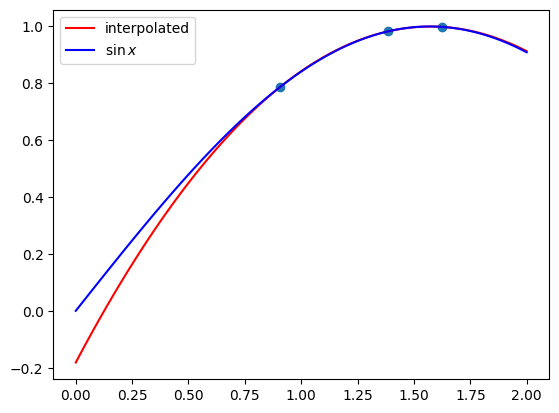

In [5]:
x_nodes = np.random.uniform(low = 0, high = 2, size=3)
y_nodes = np.sin(x_nodes)
poly_func = get_interp_func(x_nodes, y_nodes)
plot_x = np.linspace(0, 2, 100)
plot_interp = np.array(list(map(poly_func, plot_x)))
plot_sin = np.sin(plot_x)

plt.plot(plot_x, plot_interp, 'r', label = "interpolated")
plt.plot(plot_x, plot_sin, 'b', label = "$\sin x$")
plt.scatter(x_nodes, y_nodes)
plt.legend()
plt.show()

### Zadanie 2. (2 pkt)

Zaimplementować metodę Neville'a (metoda ilorazów róznicowych). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z węzłami interpolacji.

In [6]:
def get_neville_interp(xs: np.ndarray, ys: np.ndarray):
    def neville(x, xs: np.ndarray, ys: np.ndarray):
        n = len(xs)

        poly = ys.copy()

        for i in range(1, n):
            for j in range(n - i):
                poly[j] = ((x - xs[i + j]) * poly[j] + (xs[j] - x) * poly[j + 1]) / (xs[j] - xs[i + j])

        return poly[0]


    assert len(xs) == len(ys), "lengths of ys and xs don't match"
    return lambda x: neville(x, xs, ys)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6600/3295552483.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(neville_plot_x, neviller_plot_sin, 'b', label = "$\sin x$")


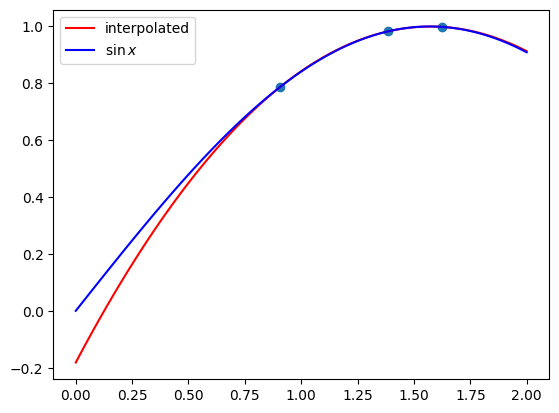

In [7]:
neville_interp_function = get_neville_interp(x_nodes, y_nodes)
neville_plot_x = np.linspace(0, 2, 100)
neville_plot_interp = np.array(list(map(neville_interp_function, neville_plot_x)))
neviller_plot_sin = np.sin(neville_plot_x)

plt.plot(neville_plot_x, neville_plot_interp, 'r', label = "interpolated")
plt.plot(neville_plot_x, neviller_plot_sin, 'b', label = "$\sin x$")
plt.scatter(x_nodes, y_nodes)
plt.legend()
plt.show()

### Zadanie 3. (1 pkt)

Porównać działanie metod z zadań 1 i 2 z funkcją `lagrange` ze scipy poprzez przedstawienie ich na wspólnym wykresie wraz z funkcją interpolowaną. Zbadać trzy różne funkcje:
- wielomian
- funkcję trygonometryczną
- funkcję wykładniczą

In [8]:
def plot_cmp(function_to_interp, func_name: str, x_nodes: np.ndarray, xs: np.ndarray):
    y_nodes: np.ndarray = function_to_interp(x_nodes)
    lagrange_func = get_interp_func(x_nodes, y_nodes)
    neville_func = get_neville_interp(x_nodes, y_nodes)

    ys: np.ndarray = np.array(list(map(function_to_interp, xs)))
    scipy_lagrange_ys = si.lagrange(x_nodes, y_nodes)(xs)
    lagrange_ys = np.array(list(map(lagrange_func, xs)))
    neville_ys = np.array(list(map(neville_func, xs)))

    plt.figure(figsize = (16, 8))
    plt.plot(xs, ys, c = 'b', linewidth = 6, linestyle = '--', label = func_name)
    plt.plot(xs, scipy_lagrange_ys, c = 'r', linewidth = 4, linestyle = "--", label = "scipy")
    plt.plot(xs, lagrange_ys, c = 'g', linewidth = 2, linestyle = "-", label = "lagrange")
    plt.plot(xs, neville_ys, c = 'purple', linewidth = 1 , linestyle = "-", label = "neville")
    plt.scatter(x_nodes, y_nodes, marker = 'x', s = 200, zorder = 5)
    plt.legend()
    plt.show()

1. Wielomian

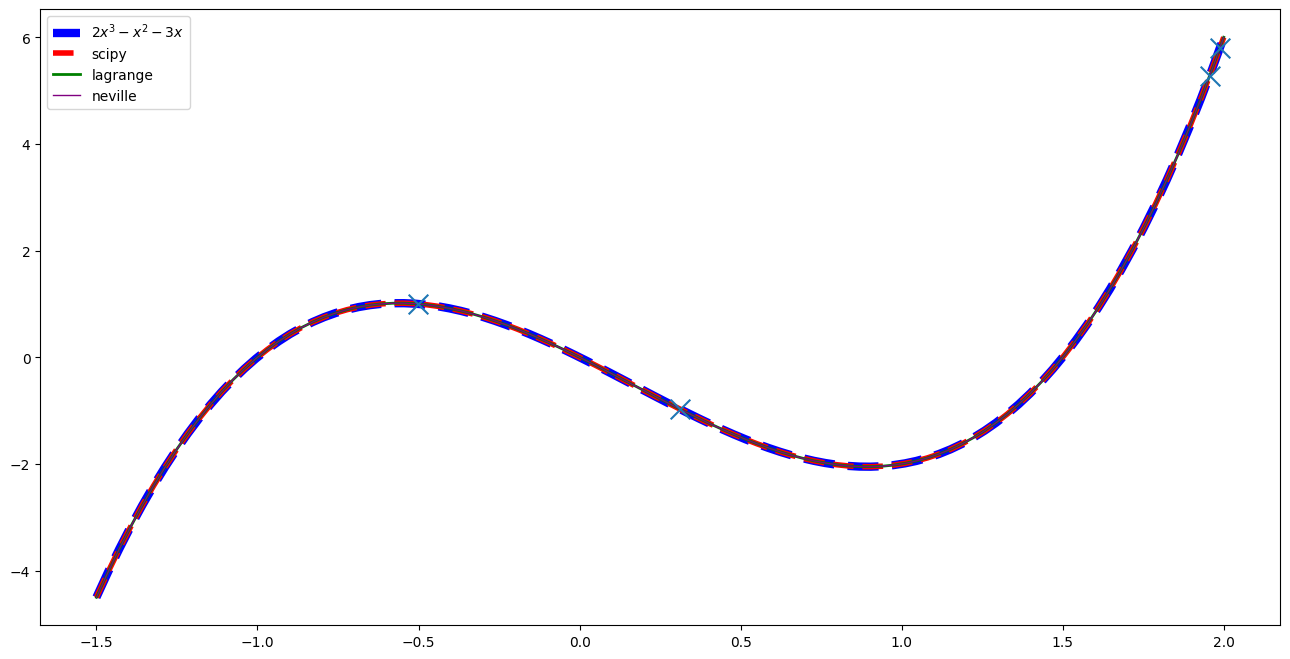

In [9]:
func_poly = lambda x: 2 * x**3 - x** 2 - 3 * x
func_name = "$ 2 x^3 - x^2 - 3 x $"
low = -1.5
high = 2
x_nodes = np.random.uniform(low = low, high = high, size = 4)
poly_xs = np.linspace(low, high, 100)

plot_cmp(func_poly, func_name, x_nodes, poly_xs)

2. funkcja trygonometryczna

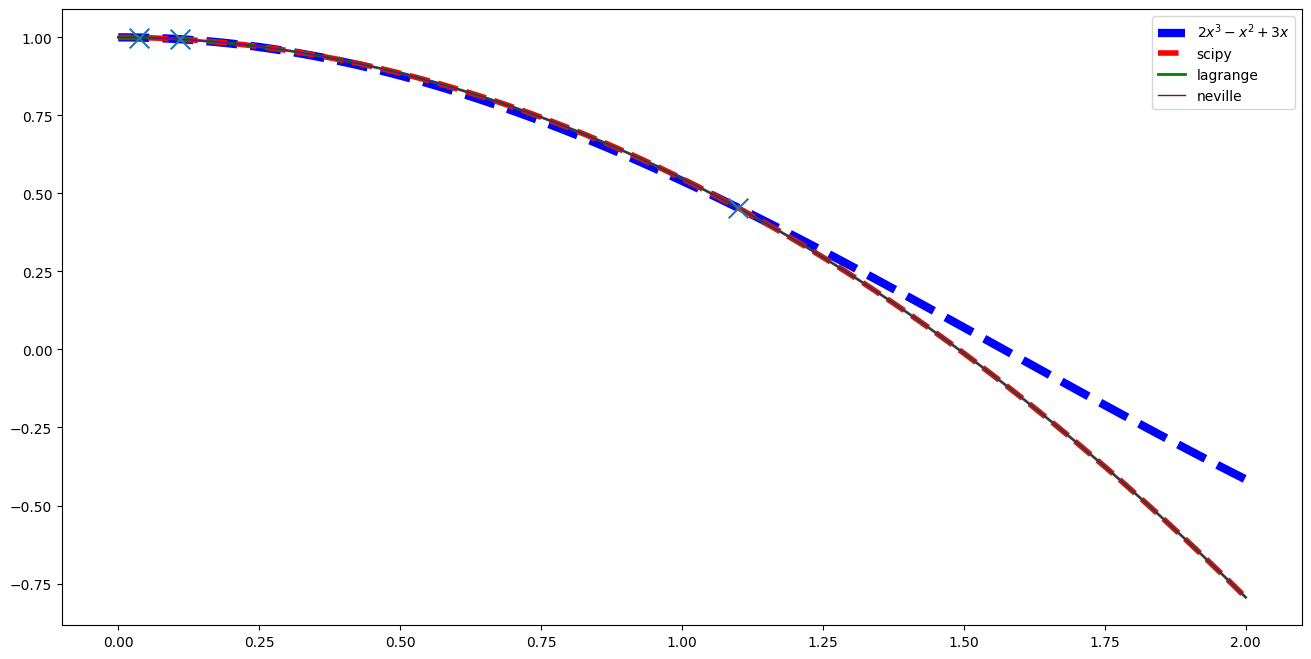

In [10]:
func_poly = np.cos
func_name = "$ 2 x^3 - x^2 + 3 x $"
low = 0
high = 2
x_nodes = np.random.uniform(low = low, high = high, size = 3)
xs = np.linspace(low, high, 100)

plot_cmp(func_poly, func_name, x_nodes, xs)

3. funkcja wykładnicza

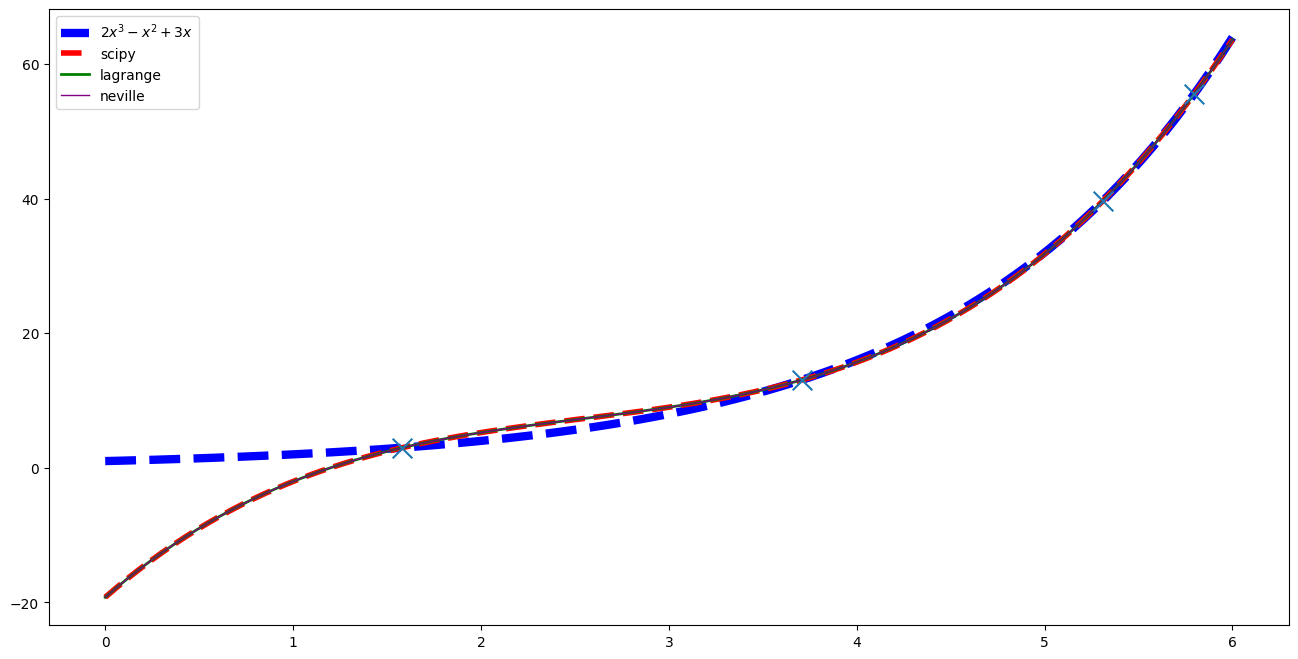

In [11]:
func_poly = lambda x: 2 ** x
func_name = "$ 2 x^3 - x^2 + 3 x $"
low = 0
high = 6
x_nodes = np.random.uniform(low = low, high = high, size = 4)
xs = np.linspace(low, high, 100)

plot_cmp(func_poly, func_name, x_nodes, xs)

## Interpolacja Hermite'a

Interpolacja Hermite’a umożliwia znalezienie wielomianu interpolacyjnego zadanej funkcji w przypadku, gdy oprócz wartości funkcji w pewnych punktach $x_1,...,x_n$ dane są również wartości jej pochodnych, tzn. znamy

$$f(x_{1}),f(x_{2}),\ldots ,f(x_{n})$$

oraz

$$f'(x_{1}),\ldots ,f^{(k_{1})}(x_{1}),f'(x_2),\ldots,f^{(k_2)}(x_2)\ldots ,f'(x_{n}),\ldots ,f^{(k_{n})}(x_{n})$$

Jeżeli w danym punkcie $x_j$ znamy wyłącznie wartość funkcji, to punkt $(x_j,f(x_j))$ nazywamy *węzłem jednokrotnym*, natomiast jeżeli znamy wartości pochodnych aż do $k$-tej włącznie, to punkt $(x_j,f(x_j))$ nazywamy *węzłem $k+1$ krotnym*.

### Algorytm - teoria

Konstruujemy macierz węzłów w taki sposób, że węzęł $k$-krotny powtarzamy dokładnie $k$ razy:

$$\left[\begin{array}{c}
x_1&f(x_1)\\
x_1&f(x_1)\\
x_1&f(x_1)\\
\vdots\\
x_1&f(x_1)\\
x_2&f(x_2)\\
x_2&f(x_2)\\
\vdots\\
x_2&f(x_2)\\
\vdots\\
x_n&f(x_n)\\
x_n&f(x_n)\\
\vdots\\
x_n&f(x_n)
\end{array}\right]$$

Następnie uzupełniamy naszą macierz o kolejną kolumnę zawierającą *różnice dzielone pierwszego rzędu*$$f[x_{i-1},x_{i}]:=\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}.$$ Tam, gdzie nie możemy obliczyć różnicy dzielonej (obecny i poprzedni punkt jest taki sam) wstawiamy $$\frac{f'(x_i)}{1!}.$$

$$\left[\begin{array}{cc}
x_1&f(x_1)&-\\
x_1&f(x_1)&f'(x_1)\\
x_1&f(x_1)&f'(x_1)\\
\vdots&\vdots\\
x_1&f(x_1)&f'(x_1)\\
x_2&f(x_2)&f[x_1,x_2]\\
x_2&f(x_2)&f'(x_2)\\
\vdots&\vdots\\
x_2&f(x_2)&f'(x_2)\\
\vdots&\vdots\\
x_n&f(x_n)&f[x_{n-1},x_n]\\
x_n&f(x_n)&f'(x_n)\\
\vdots&\vdots\\
x_n&f(x_n)&f'(x_n)
\end{array}\right]$$

W kolejnym kroku uzupełniamy macierz o kolumnę *różnic dzielonych drugiego rzędu* $$f[x_{i-2},x_{i-1},x_i]=\frac{f[x_{i-1},x_i]-f[x_{i-2},x_{i-1}]}{x_i-x_{i-2}}$$

Jeżeli $f[x_{i-1},x_i]$ lub $f[x_{i-2},x_{i-1}]$ nie istniała, to do wzoru wstawiamy zastępującą ją pochodną.

Jeżeli nie jesteśmy wstanie obliczyć różnicy dzielonej drugiego rzędu (dwa poprzednie punkty są takie same, jak aktualny), to wstawiamy $$\frac{f''(x_i)}{2!}.$$

$$\left[\begin{array}{ccc}
x_1&f(x_1)&-&-\\
x_1&f(x_1)&f'(x_1)&-\\
x_1&f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}\\
\vdots&\vdots&\vdots\\
x_1&f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}\\
x_2&f(x_2)&f[x_1,x_2]&f[x_1,x_1,x_2]\\
x_2&f(x_2)&f'(x_2)&f[x_1,x_2,x_2]\\
\vdots&\vdots&\vdots\\
x_2&f(x_2)&f'(x_2)&\frac{f''(x_1)}{2}\\
\vdots&\vdots&\vdots\\
x_n&f(x_n)&f[x_{n-1},x_n]&f[x_{n-1},x_{n-1},x_n]\\
x_n&f(x_n)&f'(x_n)&f[x_{n-1},x_n,x_n]\\
\vdots&\vdots&\vdots\\
x_n&f(x_n)&f'(x_n)&\frac{f''(x_1)}{2}
\end{array}\right]$$

Kontynuujemy rekurencyjnie obliczając kolejne *różnice dzielone $k$-tego rzędu* $$f[x_{i-k},x_{i-k+1},...,x_i]=\frac{f[x_{i-k+1},...,x_i]-f[x_{i-k},x_{i-k+1},...,x_{i-1}]}{x_i-x_{i-k}}$$

pamiętając o zastąpieniu wyrażeń nieistniejących wyrażeniami z pochodnymi dzielonymi przez $(k-1)!$ a tam, gdzie mianownik byłby równy zero wstawiamy zamiast nich $$\frac{f^{(k)}(x_i)}{k!}$$.

Po zakończeniu algorytmu otrzymujemy macierz, która po opuszczeniu kolumny zawierającej $x_i$ jest macierzą  kwadratową

$$H=\left[\begin{array}{ccccc}
f(x_1)&-&-&\cdots&-\\
f(x_1)&f'(x_1)&-&\cdots&-\\
f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}&\cdots&-\\
f(x_2)&f[x_1,x_2]&f[x_1,x_1,x_2]&\cdots&-\\
f(x_2)&f'(x_2)&f[x_1,x_2,x_2]&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_2)&f'(x_2)&\frac{f''(x_1)}{2}&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_n)&f[x_{n-1},x_n]&f[x_{n-1},x_{n-1},x_n]&\cdots&-\\
f(x_n)&f'(x_n)&f[x_{n-1},x_n,x_n]&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_n)&f'(x_n)&\frac{f''(x_1)}{2}&\cdots&f[x_1,...,x_n]
\end{array}\right]$$

Wielomian interpolacyjny Hermite'a ma postać $$W(x)=\sum _{i=1}^{m}a_{i}\prod _{j=1}^{i-1}(x-x_{j}),$$



gdzie współczynniki $a_i$ są wyrazami na przekątnej macierzy $H$ a $m$ jest liczbą węzłów liczoną wraz z ich krotnościami.

### Przykład

Mamy dane

|x_i| f(x_i) |f'(x_i)|f''(x_i)|
|-|-|-|-|
|2 |4 |4 |2|
|3 |9  |  |

Układamy macierz węzłów powtórzonych zgodnie z ich krotnością

$$\left[\begin{array}{c}
2&4\\
2&4\\
2&4\\
3&9
\end{array}\right]$$

Uzupełniamy o różnice dzielone pierwszego rzędu (lub wartości pierwszej pochodnej)

$$\left[\begin{array}{ccc}
2&4&-\\
2&4&4\\
2&4&4\\
3&9&5
\end{array}\right]$$

...drugiego rzędu...

$$\left[\begin{array}{cccc}
2&4&-&-\\
2&4&4&-\\
2&4&4&1\\
3&9&5&1
\end{array}\right]$$

...trzeciego rzędu...

$$\left[\begin{array}{ccccc}
2&4&-&-&-\\
2&4&4&-&-\\
2&4&4&1&-\\
3&9&5&1&0
\end{array}\right]$$

Otrzymujemy wielomian Hermite'a $$W(x)=4+4(x-2)+(x-2)(x-2)+0\cdot(x-2)(x-2)(x-2)$$

### Algorytm - praktyka

Załóżmy, że mamy dane punkty $x_0,...,x_n$, wartości funkcji $y_0,...,y_n$ oraz wartości pierwszej pochodnej $p_0,...,p_n$.

#### START

Tworzymy macierz A wymiaru $(2n+1)\times(2n+1)$ wypełnioną zerami i zerowy wektor pomocniczy $b$ o długości $2n+1$.

#### Krok 1

Dla $i=0,...,n$ wykonujemy:

- $b_{2i}=x_i$
- $b_{2i+1}=x_i$
- $A_{2i,0}=y_i$
- $A_{2i+1,0}=y_i$
- $A_{2i+1,1}=p_i$
- jeżeli $i\neq 0$ to $$A_{2i,1}=\frac{A_{2i,0}-A_{2i-1,0}}{b_{2i}-b_{2i-1}}$$

#### Krok 2

Dla $i=2,...,2n+1$ wykonujemy:

dla $j=2,...,i$ wykonujemy: $$A_{i,j}=\frac{A_{i,j-1}-A_{i-1,j-1}}{b_i-b_{i-j}}$$

#### Krok 3

Zwracamy wektor współczyników $A_{0,0},A_{1,1},...,A_{2n+1,2n+1}$ i konstuujemy wielomian $$W(x)=\sum _{i=0}^{2n+1}A_{i,i}\prod _{j=0}^{i-1}(x-x_{j}),$$

#### STOP

W `scikit.interpolation` funkcja `CubicHermiteSpline` znajduje wielomian interpolacyjny Hermite'a dla pierwszych pochodnych. W przypadku gdy dane są również wartości wyższych pochodnych wielomian interpolacyjny znajduje funkcja `BPoly.from_derivatives`.

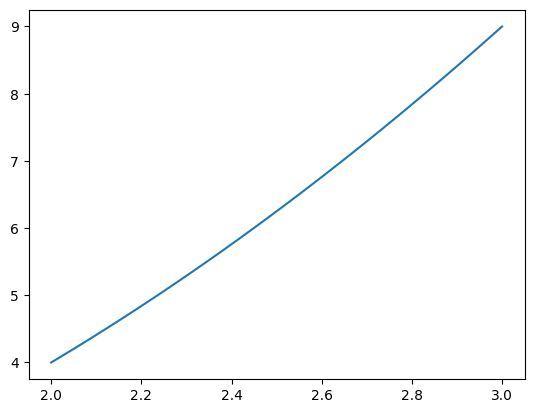

In [12]:
hermite=si.BPoly.from_derivatives([2, 3], [[4, 4, 2], [9]] )

xpp=np.linspace(2,3,100)
plt.plot(xpp,hermite.__call__(xpp))

### Zadanie 4. (3 pkt)

Zaimplementować algorytm interpolacji Hermitte'a. Przetestować go na przykładowych danych wejściowych (mogą być powyższe) i porównać z działaniem funkcji z scipy.

**Note**
Można skorzystać z wersji uproszczonej z pojedynczymi pochodnymi

### Zadanie 5. (1 pkt)
Na przykładzie dowolnego wielomianu interpolacyjnego zobrazować graficznie i wyjaśnić czytelnikowi tzw. efekt Rungego (co za dużo, to niezdrowo).